![](image/OC.PNG)

![](image/ONCFM_logo.PNG)

# <font size="5" style="color:#5D9B9B">Sommaire</font>


* [<font size="4" style="color:#5D9B9B">Importation des librairies</font>](#librairies)


* [<font size="4" style="color:#5D9B9B">1 - Importation et préparation des données</font>](#1)
    * [<font size="3" style="color:#5D9B9B">Billets</font>](#11)
    * [<font size="3" style="color:#5D9B9B">Valeurs manquantes</font>](#12)

    
* [<font size="4" style="color:#5D9B9B">2 - Analyse descriptive des données</font>](#2)
    * [<font size="3" style="color:#5D9B9B">Analyse des variables</font>](#21)
    * [<font size="3" style="color:#5D9B9B">Répartition entre les vrais et faux billets</font>](#22)
    * [<font size="3" style="color:#5D9B9B">Corrélations</font>](#23)
    * [<font size="3" style="color:#5D9B9B">ACP</font>](#24)


* [<font size="4" style="color:#5D9B9B">3 - K-means (non supervisé)</font>](#3)
    * [<font size="3" style="color:#5D9B9B">Clustering</font>](#31) 
    * [<font size="3" style="color:#5D9B9B">Analyse des clusters</font>](#32)
    * [<font size="3" style="color:#5D9B9B">Algorithme</font>](#33)


* [<font size="4" style="color:#5D9B9B">4 - Régression logistique (supervisé)</font>](#4)
    * [<font size="3" style="color:#5D9B9B">Modèle</font>](#41) 
    * [<font size="3" style="color:#5D9B9B">Algorithme</font>](#42)


* [<font size="4" style="color:#5D9B9B">5 - Comparaison des modèles</font>](#5)
    * [<font size="3" style="color:#5D9B9B">Avec un essais</font>](#51)
    * [<font size="3" style="color:#5D9B9B">Avec plusieurs essais</font>](#52)
    

* [<font size="4" style="color:#5D9B9B">6 - Résultats</font>](#6)
    * [<font size="3" style="color:#5D9B9B">Importation</font>](#61)
    * [<font size="3" style="color:#5D9B9B">K-means</font>](#62)
    * [<font size="3" style="color:#5D9B9B">Régression logistique</font>](#63)
    * [<font size="3" style="color:#5D9B9B">Document final</font>](#64)

# <font size="7" style="color:#5D9B9B">Importation des librairies</font> <a class="anchor" id="librairies"></a>

In [47]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
pd.options.mode.chained_assignment = None  #Pour éviter les faux positifs sur SettingWithCopyWarning

# <font size="7" style="color:#5D9B9B">1 - Importation et préparation des données</font> <a class="anchor" id="1"></a>

## <font size="6" style="color:#FBAA99">Billets</font> <a class="anchor" id="11"></a>

In [49]:
billets_brut = pd.read_csv("billets.csv", sep = ';')
billets_brut.head(5) #Dataframe

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [50]:
billets_brut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


##### Il manque des valeurs dans margin_low

## <font size="6" style="color:#FBAA99">Valeurs manquantes</font> <a class="anchor" id="12"></a>

In [51]:
billets_brut[billets_brut['margin_low'].isna()==True].head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   
197        True    171.45       103.66        103.80         NaN       3.62   
241        True    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

### Comparaison des données avec et sans Na

In [52]:
billets_brut[billets_brut['margin_low'].isna()==True].describe()

diagonal  height_left  height_right  margin_low  margin_up  \
count   37.000000    37.000000     37.000000         0.0  37.000000   
mean   171.928649   103.958378    103.874054         NaN   3.087838   
std      0.297145     0.288680      0.380631         NaN   0.239782   
min    171.370000   103.260000    102.820000         NaN   2.560000   
25%    171.800000   103.720000    103.620000         NaN   2.990000   
50%    171.930000   103.950000    103.860000         NaN   3.070000   
75%    172.070000   104.150000    104.120000         NaN   3.230000   
max    172.660000   104.490000    104.660000         NaN   3.620000   

           length  
count   37.000000  
mean   112.826486  
std      0.851388  
min    110.310000  
25%    112.410000  
50%    112.950000  
75%    113.350000  
max    114.440000

In [53]:
billets_brut.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

##### Les données avec et sans Na sont similaires

### Prédiction des valeurs manquantes

In [54]:
from sklearn import linear_model

data_l = billets_brut.dropna()

x_l = data_l[['diagonal','height_left','height_right','margin_up', 'length']]
y_l = data_l[['margin_low']]

regr_line = linear_model.LinearRegression()
regr_line.fit(x_l, y_l)

LinearRegression()

In [55]:
#Prédiction des na de margin_low

#Données
data_l_p = billets_brut[billets_brut['margin_low'].isna()==True][['diagonal','height_left','height_right','margin_up', 'length']]

#Prédiction
na_predict = regr_line.predict(data_l_p)

#Dataframe avec données + prédiction + is_genuine
data_l_p["margin_low"] = na_predict
data_l_p["is_genuine"] = billets_brut[billets_brut['margin_low'].isna()==True][['is_genuine']]
billets_na = data_l_p[['is_genuine','diagonal','height_left','height_right','margin_low','margin_up', 'length']]

#Billets = data_l (sans les na) + billets_na (na avec prédiction)
billets = pd.concat([data_l,billets_na]).sort_index()

In [56]:
#Exemple avec l'index 72 qui contient un na
print(billets.margin_low.iloc[70:75]) 
print(billets_brut.margin_low.iloc[70:75]) 

70    4.350000
71    4.090000
72    4.318525
73    4.080000
74    3.810000
Name: margin_low, dtype: float64
70    4.35
71    4.09
72     NaN
73    4.08
74    3.81
Name: margin_low, dtype: float64


### Exportation des données préparées

In [57]:
billets.to_csv(r'billets_prep.csv',index = False, header=True)

# <font size="7" style="color:#5D9B9B">2 - Analyse descriptive des données</font> <a class="anchor" id="2"></a>

## <font size="6" style="color:#FBAA99">Analyse des variables</font> <a class="anchor" id="21"></a>

In [58]:
billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.483475     3.151473   
std       0.305195     0.299462      0.325627     0.659632     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [59]:
#Analyse des outliers par écart type
from scipy.stats import zscore

billets.apply(zscore).describe()

is_genuine      diagonal   height_left  height_right    margin_low  \
count  1.500000e+03  1.500000e+03  1.500000e+03  1.500000e+03  1.500000e+03   
mean   3.564556e-16 -7.849706e-14  4.815781e-14 -2.759974e-14  1.140699e-15   
std    1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00   
min   -1.414214e+00 -3.010357e+00 -2.971432e+00 -3.380166e+00 -2.280025e+00   
25%   -1.414214e+00 -6.832007e-01 -6.999333e-01 -6.460667e-01 -7.028617e-01   
50%    7.071068e-01  5.113189e-03  3.496326e-02 -9.420867e-04 -2.630758e-01   
75%    7.071068e-01  6.934271e-01  6.696467e-01  7.056229e-01  5.861658e-01   
max    7.071068e-01  3.446683e+00  2.840932e+00  3.163240e+00  3.664667e+00   

          margin_up        length  
count  1.500000e+03  1.500000e+03  
mean  -4.056015e-16  1.707597e-15  
std    1.000334e+00  1.000334e+00  
min   -3.803785e+00 -3.654697e+00  
25%   -6.967992e-01 -7.433186e-01  
50%   -4.951040e-02  3.226587e-01  
75%    6.840835e-01  7.582193e-01  
max    3.273239e+00  2.019053e+00

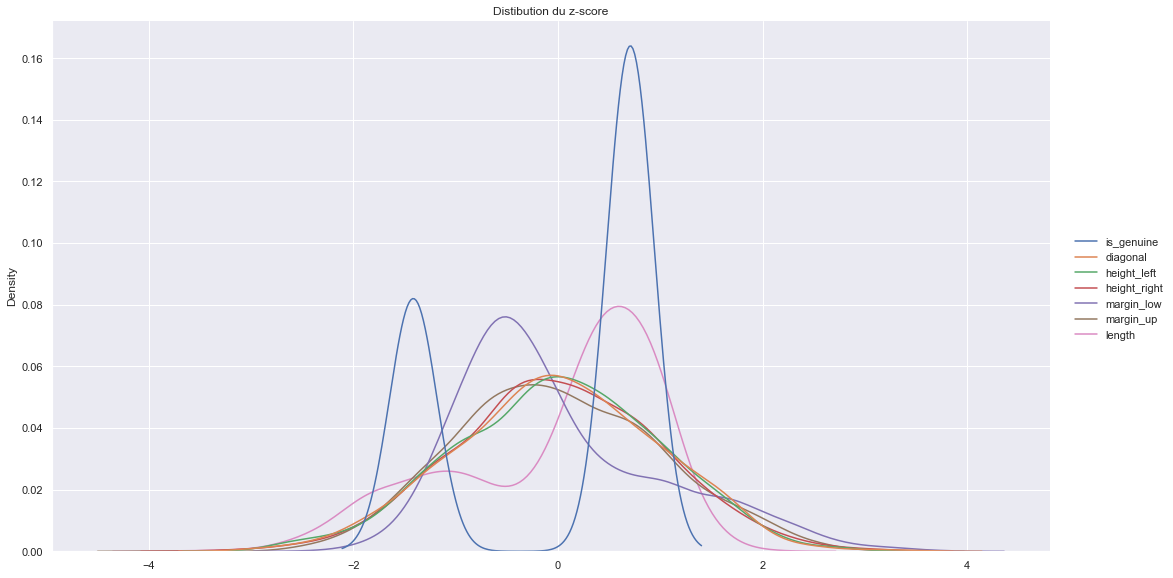

In [60]:
#Représentation graphique
sns.set(rc = {'figure.figsize':(15,8)}) #Paramètres pour les graphiques

sns.displot(billets.apply(zscore), kind="kde",height=8, aspect=15/8)
plt.title("Distibution du z-score")
plt.savefig('image/graphiques/dispersion_variables.png')
plt.show()

##### Il n'y a aucune valeur aberrante 

## <font size="6" style="color:#FBAA99">Répartition entre les vrais et faux billets</font> <a class="anchor" id="22"></a>

In [61]:
vrais = billets[billets['is_genuine']==True].is_genuine.count()
faux = billets[billets['is_genuine']==False].is_genuine.count()
print("Il y a "+str(vrais)+" vrais billets et "+str(faux)+" faux billets")

Il y a 1000 vrais billets et 500 faux billets


## <font size="6" style="color:#FBAA99">Corrélations</font> <a class="anchor" id="23"></a>

#### Coefficient de corrélation linéaire avec la méthode Pearson

In [62]:
sns.set(rc = {'figure.figsize':(15,8)}) #Paramètres pour les graphiques

sns.set(font_scale = 1.2)
billets_corr = billets.corr(method='pearson')
sns.heatmap(billets_corr, cmap='OrRd', annot=True)
plt.title("Matrice de corrélation")
plt.savefig('image/graphiques/matrice_correlation.png')
plt.show()

#### Autre visualisation avec pairplot

In [63]:
sns.set(style="ticks")
sns.pairplot(billets[["height_left","height_right","margin_low","margin_up","length","diagonal","is_genuine"]], hue="is_genuine")
plt.title("Pairplot")
plt.savefig('image/graphiques/Pairplot.png')

##### Certaines variables ont un fort impact sur la véracité d'un billet (length, margin) contrairement à d'autres (diagonal)
##### Les variables autres que is_genuine sont peu corrélées entre elles, sauf length avec margin_low et margin_up (normal car length = 0.85)

### Analyse de la dispersion des variables

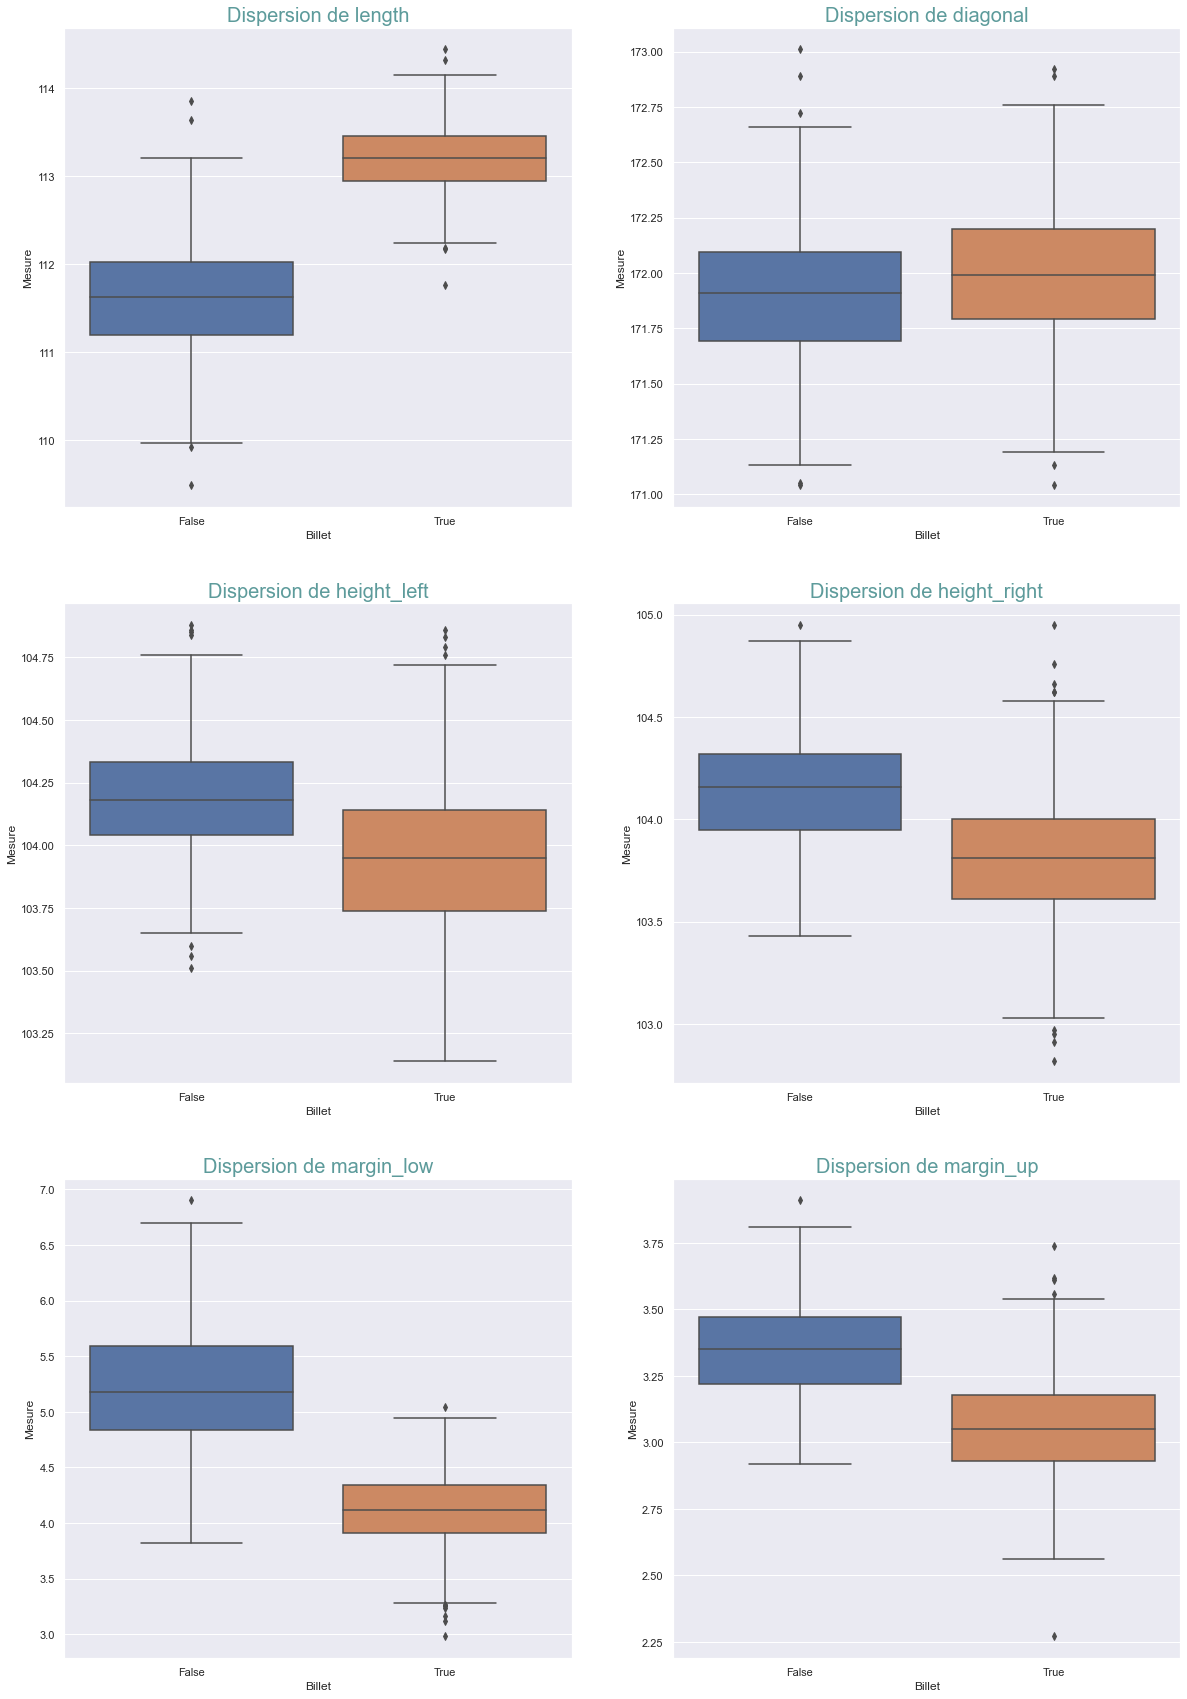

In [64]:
sns.set(rc = {'figure.figsize':(15,8)}) #Paramètres pour les graphiques

def multi_boxplot(variables, i):
    ax = fig.add_subplot(i)
    ax = sns.boxplot(x="is_genuine", y=variables, data=billets)
    plt.xlabel('Billet')
    plt.ylabel("Mesure")
    plt.title("Dispersion de "+str(variables), color="#5D9B9B", size=20)

variables_liste = ["length","diagonal","height_left","height_right","margin_low","margin_up"]

fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 321
for variables in variables_liste :
    multi_boxplot(variables, i)
    i+=1

fig.savefig('image/graphiques/dispersion_variables.png')

##### L'analyse des indices de corrélation se confirme, diagonal est peu significative

In [65]:
#Division du dataframe en gardant les variables pertinentes
billets_train = billets.sample(frac = 0.8)
billets_test = billets.drop(billets_train.index).reset_index().iloc[:,1:] #Reset index pour correspondre aux clusters
billets_train = billets_train.reset_index().iloc[:,1:]
billets_train.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.27       104.29        104.22        3.89       3.53   
1        True    171.35       104.62        103.58        4.32       2.88   
2       False    171.55       103.76        104.21        5.11       3.01   
3       False    171.91       104.28        103.86        5.48       3.37   
4        True    171.80       103.71        103.67        4.48       3.18   

   length  
0  113.50  
1  113.42  
2  111.48  
3  113.13  
4  112.76

## <font size="6" style="color:#FBAA99">ACP</font> <a class="anchor" id="24"></a>

In [66]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(20,20))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.savefig('image/graphiques/acp.png')
            plt.show(block=False)

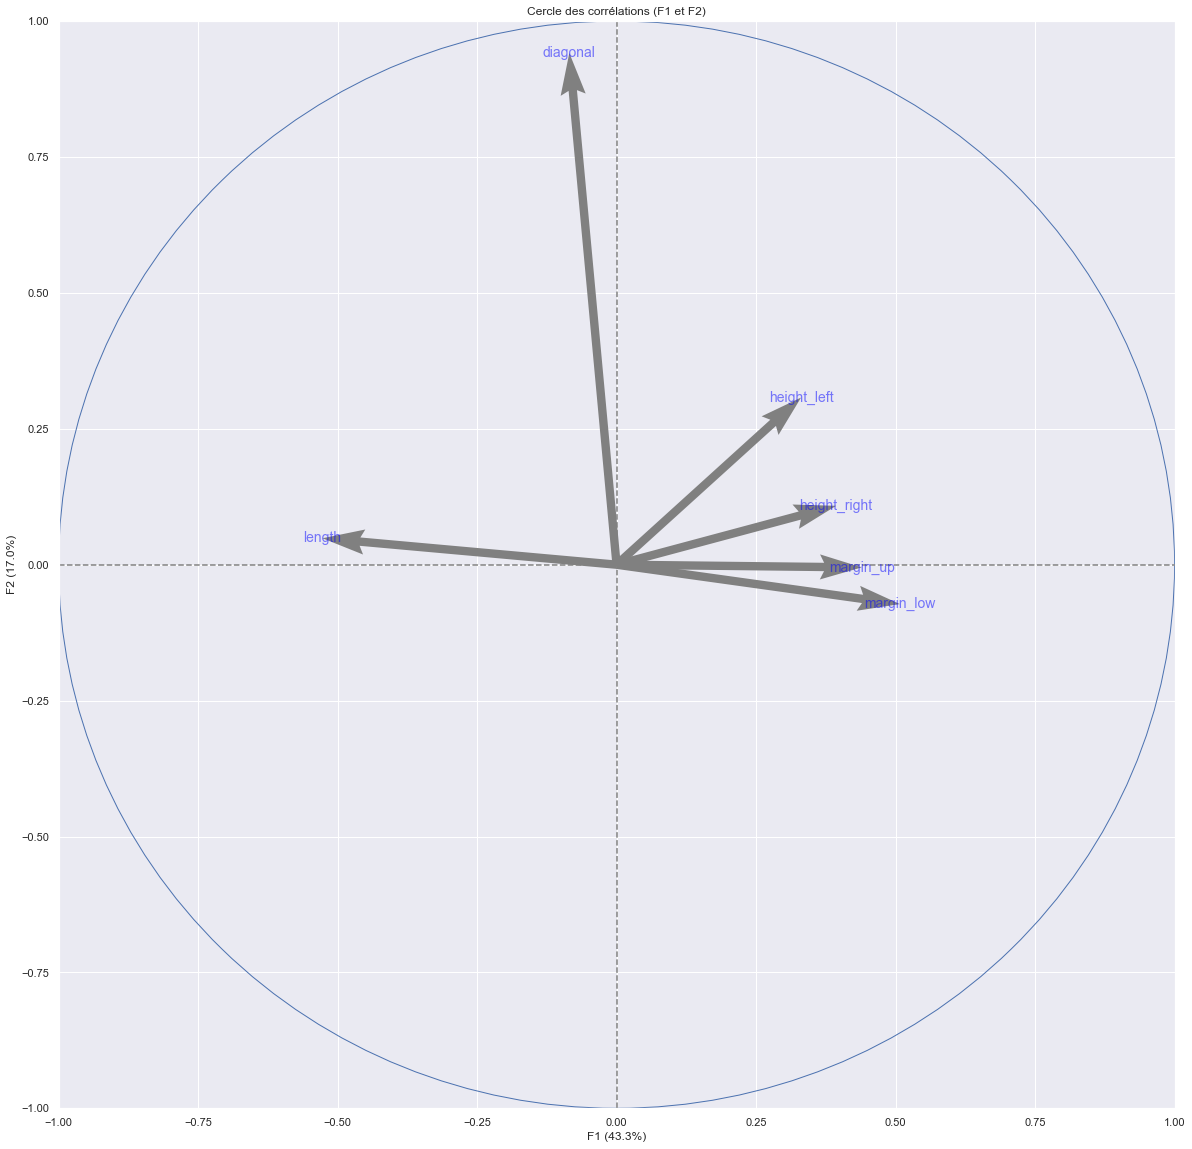

In [67]:
import numpy as np

from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 2

# import de l'échantillon
data = billets.iloc[:,1:]

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean())
X = data_pca.values
names = data.index
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
plt.show()

##### L'ACP confirme les corrélations

### On fractionne de la dataframe avant de lancer les algorithmes pour mieux les comparer (même train et test)

In [68]:
#On garde les variables pertinentes
variables = billets_train.iloc[:,2:]
variables.head()

height_left  height_right  margin_low  margin_up  length
0       104.29        104.22        3.89       3.53  113.50
1       104.62        103.58        4.32       2.88  113.42
2       103.76        104.21        5.11       3.01  111.48
3       104.28        103.86        5.48       3.37  113.13
4       103.71        103.67        4.48       3.18  112.76

# <font size="7" style="color:#5D9B9B">3 - K-means</font> <a class="anchor" id="3"></a>

## <font size="6" style="color:#FBAA99">Clustering</font> <a class="anchor" id="31"></a>

### Nombre de clusters optimal

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = billets.iloc[:,2:]

features = data.values
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(StandardScaler().fit_transform(features))
    sse.append(kmeans.inertia_)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


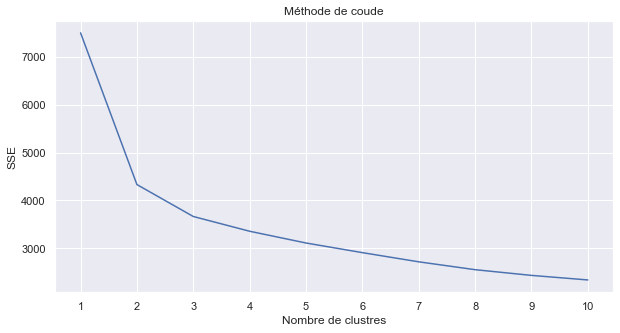

In [70]:
#Méthode de coude
sns.set(rc = {'figure.figsize':(10,5)})

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de clustres")
plt.ylabel("SSE")
plt.title("Méthode de coude")
plt.show()

##### Le nombre de clusters idéale semble être 2, mais comme nous allons le voir par la suite, 3 clusters présentent de meilleurs résultats (voir : 5 - Comparaison des modèles/Avec plusieurs essais

In [71]:
cluster_nb = int(input('Nombre de cluster = '))

Nombre de cluster = 3


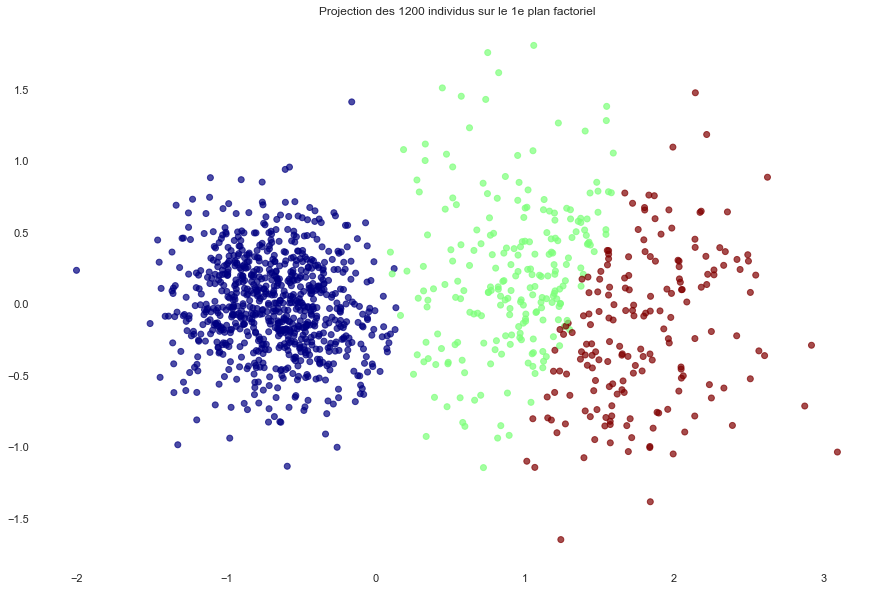

In [72]:
#K-means
sns.set(rc = {'figure.figsize':(15,10)})

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = cluster_nb

# Import de l'échantillon
data = variables

# Préparation des données pour le clustering
X = data.values

X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.axes().set(facecolor = "white")
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(float), cmap = 'jet', alpha=.7)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.savefig('image/graphiques/1er_plan.png')
plt.show(block=False)

##### L'analyse de la méthode de coude se confirme avec deux groupes

## <font size="6" style="color:#FBAA99">Analyse des clusters</font> <a class="anchor" id="32"></a>

### Dataframe

In [73]:
#Dataframe avec billets et clusters
clusters = pd.DataFrame(data=km.labels_)
clusters.rename(columns={0: 'cluster'}, inplace=True)

billets_clusters = pd.merge(billets_train, clusters,
        left_index=True, right_index=True)
billets_clusters

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    172.27       104.29        104.22        3.89       3.53   
1           True    171.35       104.62        103.58        4.32       2.88   
2          False    171.55       103.76        104.21        5.11       3.01   
3          False    171.91       104.28        103.86        5.48       3.37   
4           True    171.80       103.71        103.67        4.48       3.18   
...          ...       ...          ...           ...         ...        ...   
1195        True    172.17       103.75        103.29        4.43       2.88   
1196       False    172.25       104.21        103.98        5.71       3.50   
1197        True    172.01       103.95        103.77        4.16       3.10   
1198        True    171.83       104.54        103.91        4.11       3.05   
1199        True    172.16       104.43        104.06        4.51       3.19   

      length  cluster  
0     113.50        0  
1     113.42        0  
2     111.48        2  
3     113.13        1  
4     112.76        0  
...      ...      ...  
1195  113.38        0  
1196  111.88        1  
1197  113.19        0  
1198  113.55        0  
1199  112.69        0  

[1200 rows x 8 columns]

In [74]:
#Nombre de billets vrais et faux dans chaque cluster
billets_clusters_nb = billets_clusters.groupby(['cluster','is_genuine']).count().diagonal.reset_index()
billets_clusters_nb.rename(columns={'diagonal': 'nombre'}, inplace=True)
billets_clusters_nb

cluster  is_genuine  nombre
0        0       False      10
1        0        True     781
2        1       False     219
3        1        True       8
4        2       False     182

In [75]:
#Une ligne par cluster
billets_clusters_conf = billets_clusters_nb.pivot(index='cluster', columns='is_genuine').reset_index()
billets_clusters_conf = billets_clusters_conf.fillna(0)
billets_clusters_conf

cluster nombre       
is_genuine          False   True
0                0   10.0  781.0
1                1  219.0    8.0
2                2  182.0    0.0

In [76]:
#Pourcentage de véracité du billet (cluster)
billets_clusters_conf_array = np.array(billets_clusters_conf)
billets_clusters_conf = pd.DataFrame(data=billets_clusters_conf_array, columns=["cluster", "False", "True"])
billets_clusters_conf['veracite'] = (billets_clusters_conf["True"]/(billets_clusters_conf["False"]+billets_clusters_conf["True"]))*100
billets_clusters_conf

cluster  False   True   veracite
0      0.0   10.0  781.0  98.735777
1      1.0  219.0    8.0   3.524229
2      2.0  182.0    0.0   0.000000

In [77]:
#On garde les variables utiles
billets_clusters_conf = billets_clusters_conf[['cluster','veracite']]
billets_clusters_conf['veracite'] = billets_clusters_conf['veracite'].round(2)
billets_clusters_conf

cluster  veracite
0      0.0     98.74
1      1.0      3.52
2      2.0      0.00

### Représentation graphique

In [78]:
#Répartition des vrais et faux billets par cluster
graph = sns.catplot(x="cluster", y="nombre", kind="bar", hue="is_genuine", data=billets_clusters_nb, height=6, aspect=4/2)
graph.set(xlabel="Cluster", ylabel = "Nombre de billets")
graph.fig.suptitle("Répartition par cluster")
plt.savefig('image/graphiques/representation_clusters.png')
plt.show()

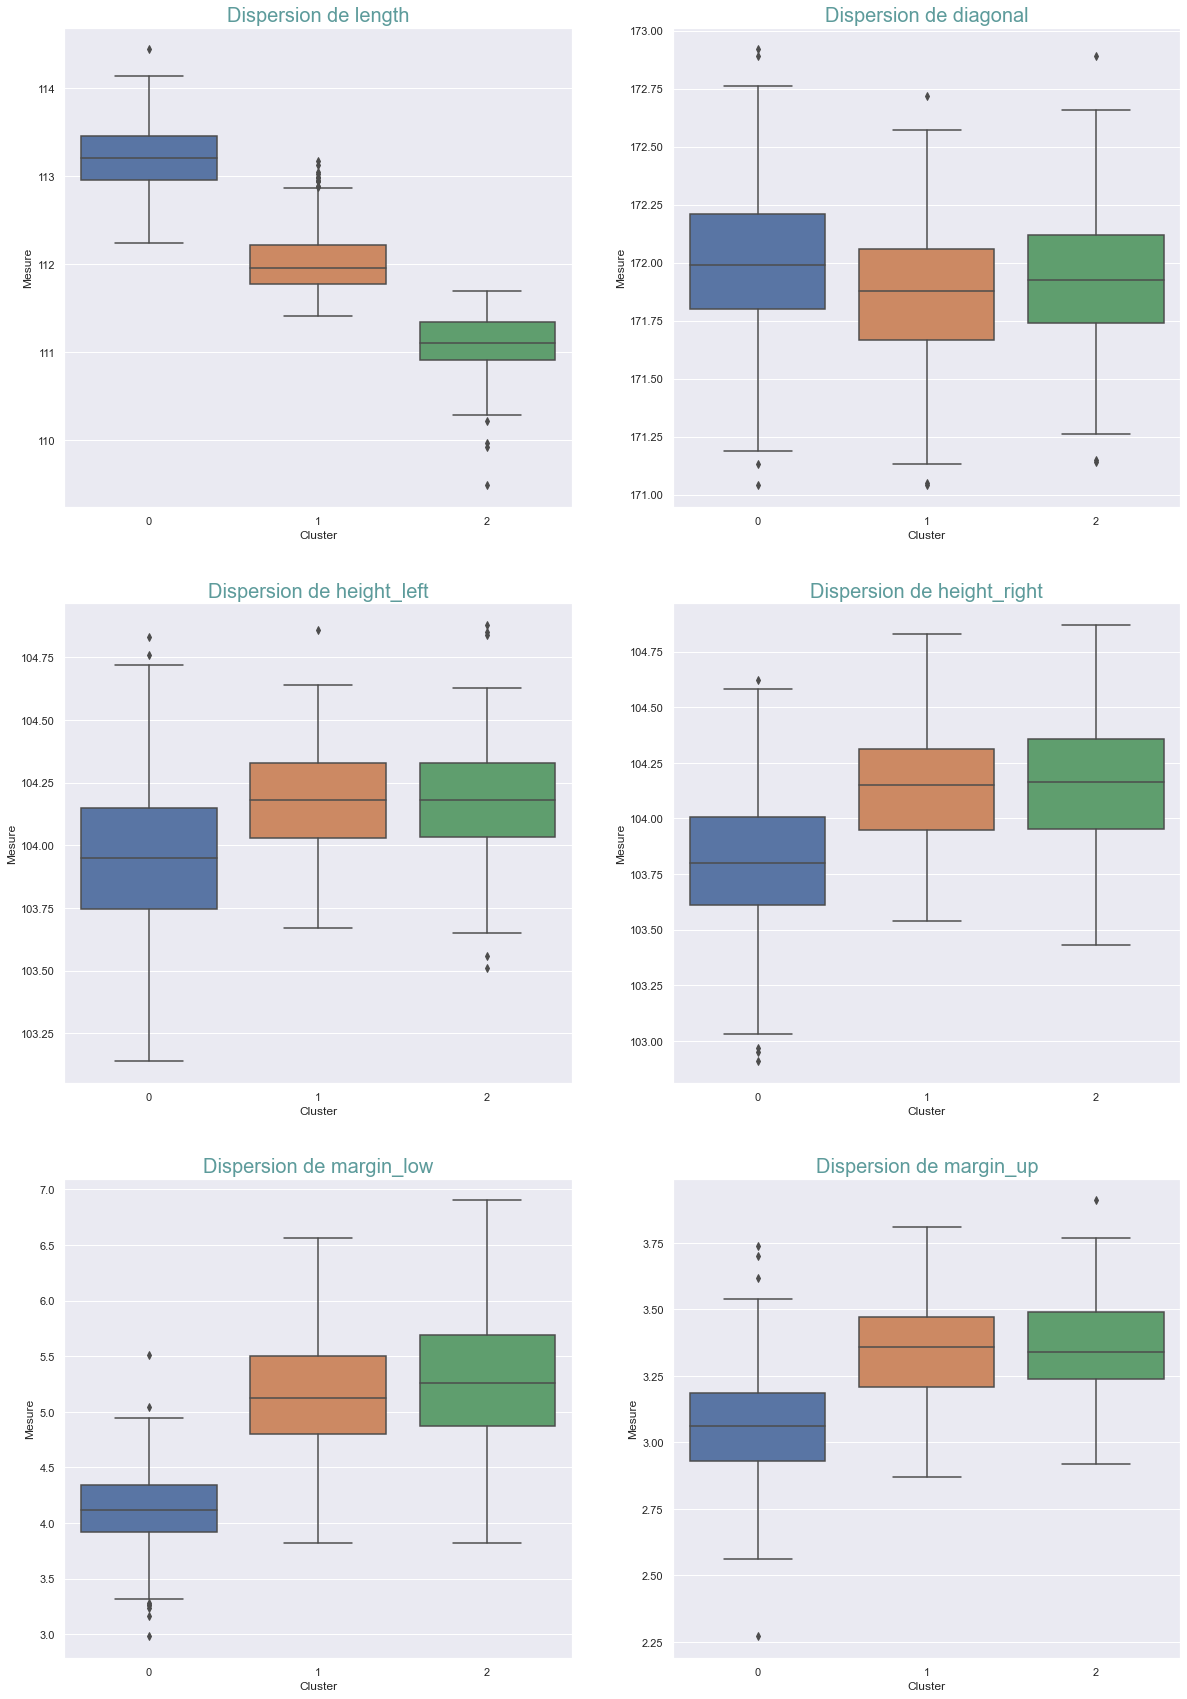

In [79]:
#Dispersion des variables de chaque cluster

def multi_boxplot(variables, i):
    ax = fig.add_subplot(i)
    ax = sns.boxplot(x="cluster", y=variables, data=billets_clusters)
    plt.xlabel('Cluster')
    plt.ylabel("Mesure")
    plt.title("Dispersion de "+str(variables), color="#5D9B9B", size=20)

variables_liste = ["length","diagonal","height_left","height_right","margin_low","margin_up"]

fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 321
for variables in variables_liste :
    multi_boxplot(variables, i)
    i+=1

fig.savefig('image/graphiques/dispersion_variables_cluster.png')

##### Même si diagonal n'est pas utilisée pour le clustering et les algorithmes, on l'intègre comme donnée dans les clusters

## <font size="6" style="color:#FBAA99">Algorithme</font> <a class="anchor" id="33"></a>

### Précision

Seuil de véracité (%) = 95


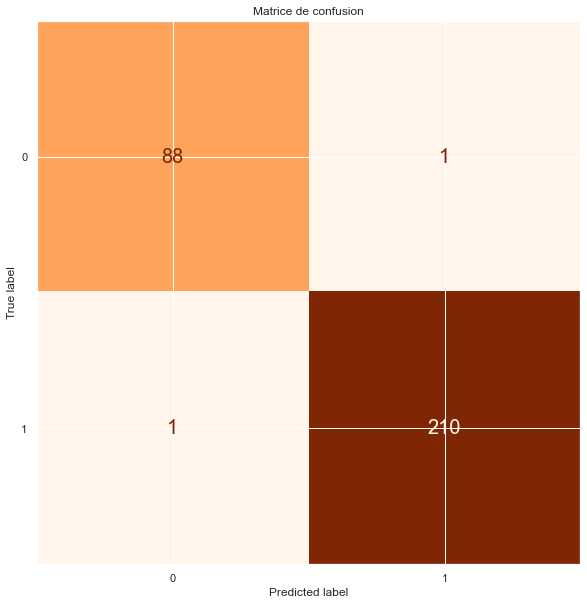

Le modèle k-means est précis à 99.33 % avec 2 erreurs dont :
- 1 faux négatifs
- 1 faux positifs

La sensibilité est de 1.0
La spécificité est de 0.99


In [80]:
#Importation des données de test
billets_production = billets_test

#Préparation
billets_predict = billets_production.iloc[:,billets_production.columns.get_loc('height_left'):billets_production.columns.get_loc('length')+1]

#Prediction des clusters par centroïd le plus proche
closest_centroid = km.predict(np.array(billets_predict))

#Dataframe pour les clusters
billets_predict_cluster = pd.DataFrame(data=closest_centroid, columns=["cluster"])

#Jointure avec le pourcentage de véracité du cluster
resultats_kmeans = pd.merge(billets_predict_cluster, billets_clusters_conf,
        how='left', on='cluster')

#Résultat avec seuil de véracité lié au cluster
seuil_veracite = float(input('Seuil de véracité (%) = '))
resultats_kmeans["resultat"] = resultats_kmeans['veracite']>seuil_veracite

#Matrice de confusion
sns.set(rc = {'figure.figsize':(10,10)}) #Paramètres pour les graphiques
plt.rcParams.update({'font.size': 20})

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_true = billets_production['is_genuine'] #Veracité réelle
y_pred = resultats_kmeans['resultat'] #Résultat du seuil de véracité

cm_kmeans = confusion_matrix(y_true, y_pred)

#Représentation graphique
matrice_confusion_kmeans = ConfusionMatrixDisplay(cm_kmeans).plot(cmap='Oranges', colorbar=False)
#plot(*, include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format=None, ax=None)
plt.title("Matrice de confusion")

#Erreurs
fp_kmeans = cm_kmeans[0,1]
fn_kmeans = cm_kmeans[1,0]
erreurs_kmeans = fn_kmeans+fp_kmeans

#sensibilité
sensibilite_kmeans = cm_kmeans[1,1]/(cm_kmeans[1,1]+fn_kmeans)

#spécificité
specificite_kmeans = cm_kmeans[0,0]/(cm_kmeans[0,0]+fp_kmeans)

#Précision
sample = len(resultats_kmeans)
precision_kmeans = 100-((erreurs_kmeans/sample)*100)

#Résultats
plt.savefig('image/graphiques/matrice_confusion_kmeans.png')
plt.show()
print("Le modèle k-means est précis à "+str((precision_kmeans).round(2))+" % avec "+str(erreurs_kmeans)+" erreurs dont :")
print("- "+str(fn_kmeans)+" faux négatifs")
print("- "+str(fp_kmeans)+" faux positifs\n")
print("La sensibilité est de "+str(sensibilite_kmeans.round(2)))
print("La spécificité est de "+str(specificite_kmeans.round(2)))

### Test sur l'exemple

In [81]:
#Importation
billets_test_imp = 'billets_production.csv'
separateur = ','
billets_production = pd.read_csv(billets_test_imp, sep = separateur)

#Préparation
billets_predict = billets_production.iloc[:,billets_production.columns.get_loc('height_left'):billets_production.columns.get_loc('length')+1]

#Prediction
closest_centroid = km.predict(np.array(billets_predict))

#Dataframe
billets_predict_cluster = pd.DataFrame(data=closest_centroid, columns=["cluster"])

#Jointure
resultats_kmeans = pd.merge(billets_production, billets_predict_cluster,
        left_index=True, right_index=True)

#Jointure
resultats_kmeans = pd.merge(resultats_kmeans, billets_clusters_conf,
        how='left', on='cluster')
resultats_kmeans

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   cluster  veracite  
0        2      0.00  
1        1      3.52  
2        1      3.52  
3        0     98.74  
4        0     98.74

# <font size="7" style="color:#5D9B9B">4 - Régression logistique</font> <a class="anchor" id="4"></a>

## <font size="6" style="color:#FBAA99">Modèle</font> <a class="anchor" id="41"></a>

In [82]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=billets, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1493
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -42.342
Date:                                       Mon, 03 Jan 2022   Deviance:                       84.685
Time:                                               00:23:19   Pearson chi2:                 2.65e+03
No. Iterations:                                           10                                         
Covariance Type:                                   nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      204.5582    241.768      0.846      0.398    -269.299     678.415
diagonal        -0.0680      1.091     -0.062      0.950      -2.207       2.071
height_left      1.7162      1.104      1.555      0.120      -0.447       3.880
height_right     2.2584      1.072      2.107      0.035       0.157       4.359
margin_low       5.7756      0.937      6.164      0.000       3.939       7.612
margin_up       10.1531      2.108      4.817      0.000       6.022      14.284
length          -5.9129      0.846     -6.991      0.000      -7.571      -4.255
================================================================================
"""

##### Avec P>|z| = 0.95, diagonal n'est pas significative (niveau de test = 5%)

## <font size="6" style="color:#FBAA99">Algorithme</font> <a class="anchor" id="42"></a>

### Précision

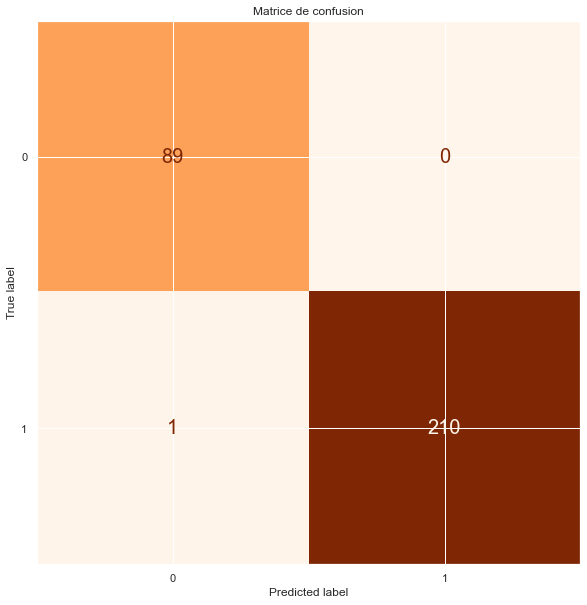

Le modèle est précis à 99.67 % avec 1 erreurs dont :
- 1 faux négatifs
- 0 faux positifs

La sensibilité est de 1.0
La spécificité est de 1.0


In [83]:
from sklearn import linear_model

#valeurs caractéristiques et valeur cible pour l'entraînement et le test
x_train = billets_train.iloc[:,billets_train.columns.get_loc('height_left'):billets_train.columns.get_loc('length')+1]
y_train = billets_train['is_genuine']

x_test = billets_test.iloc[:,billets_test.columns.get_loc('height_left'):billets_train.columns.get_loc('length')+1]
y_test = billets_test['is_genuine']

#instanciation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')

#training
modele_regLog.fit(x_train,y_train)

#précision du modèle
precision_log = modele_regLog.score(x_test,y_test)

#Matrice de confusion
y_true = y_test #is_genuine des données test
y_pred = modele_regLog.predict(np.array(x_test)) #prédiction de is_genuine avec les données test

cm_log = confusion_matrix(y_true, y_pred)

matrice_confusion_log = ConfusionMatrixDisplay(cm_log).plot(cmap='Oranges', colorbar=False)
plt.title("Matrice de confusion")

#Erreurs
fp_log = cm_log[0,1]
fn_log = cm_log[1,0]
erreurs_log = fn_log+fp_log

#sensibilité
sensibilite_log = cm_log[1,1]/(cm_log[1,1]+fn_log)

#spécificité
specificite_log = cm_log[0,0]/(cm_log[0,0]+fp_log)

#Résultats
plt.savefig('image/graphiques/matrice_confusion_reg_log.png')
plt.show()
print("Le modèle est précis à "+str((precision_log*100).round(2))+" % avec "+str(erreurs_log)+" erreurs dont :")
print("- "+str(fn_log)+" faux négatifs")
print("- "+str(fp_log)+" faux positifs\n")
print("La sensibilité est de "+str(sensibilite_log.round(2)))
print("La spécificité est de "+str(specificite_log.round(2)))

### Test sur exemple

In [84]:
#Importation
billets_test_imp = 'billets_production.csv'
separateur = ','
billets_production = pd.read_csv(billets_test_imp, sep = separateur)

#Préparation
billets_predict = billets_production.iloc[:,billets_production.columns.get_loc('height_left'):billets_production.columns.get_loc('length')+1]

#Prediction
prediction_billet = modele_regLog.predict(np.array(billets_predict))

#Dataframe
billets_predict_resultat = pd.DataFrame(data=prediction_billet, columns=["resultats"])
billets_predict_resultat.rename(columns={'resultats': 'resultats ('+str((precision_log*100).round(2))+"%)"}, inplace=True)

#Jointure entre les billets et le résultat
resultats_log = pd.merge(billets_production, billets_predict_resultat,
        left_index=True, right_index=True)
resultats_log

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   resultats (99.67%)  
0               False  
1               False  
2               False  
3                True  
4                True

# <font size="7" style="color:#5D9B9B">5 - Comparaison des modèles</font> <a class="anchor" id="5"></a>

## <font size="6" style="color:#FBAA99">Avec un essai</font> <a class="anchor" id="51"></a>

In [85]:
if (precision_log*100)>=precision_kmeans:
    methode_prec ="de la régression logistique"
else:
    methode_prec ="K-means"
    
print("Le modèle k-means :")
print("- Précision : "+str((precision_kmeans).round(2))+" %")
print("- Faux négatifs : "+str(fn_kmeans))
print("- Faux positifs : "+str(fp_kmeans))
print("- Sensibilité : "+str(sensibilite_kmeans.round(2)))
print("- Spécificité : "+str(specificite_kmeans.round(2))+"\n")

print("Le modèle de la régression logistique :")
print("- Précision : "+str((precision_log*100).round(2))+" %")
print("- Faux négatifs : "+str(fn_log))
print("- Faux positifs : "+str(fp_log))
print("- Sensibilité : "+str(sensibilite_log.round(2)))
print("- Spécificité : "+str(specificite_log.round(2))+"\n")

print("L'algorithme "+methode_prec+" est plus précis, mais ce résultat peut varier en fonction\ndes données d'entrainement (variance du modèle) et de test (difficulté).\n")
print("De plus, il parait moins grave de considérer un vrai billet comme faux plutot que laisser un faux billet en circulation.\nLa spécificité est donc un critère important.")

Le modèle k-means :
- Précision : 99.33 %
- Faux négatifs : 1
- Faux positifs : 1
- Sensibilité : 1.0
- Spécificité : 0.99

Le modèle de la régression logistique :
- Précision : 99.67 %
- Faux négatifs : 1
- Faux positifs : 0
- Sensibilité : 1.0
- Spécificité : 1.0

L'algorithme de la régression logistique est plus précis, mais ce résultat peut varier en fonction
des données d'entrainement (variance du modèle) et de test (difficulté).

De plus, il parait moins grave de considérer un vrai billet comme faux plutot que laisser un faux billet en circulation.
La spécificité est donc un critère important.


## <font size="6" style="color:#FBAA99">Avec plusieurs essais</font> <a class="anchor" id="52"></a>

### Choix du nombre de clusters

In [86]:
#Simulation à 10 000 essais pour 2, 3 et 4 clusters
#Dossier : simulation_10000
kmeans_mean_2 = pd.read_csv("simulation_10000/kmeans_mean_2.csv", sep = ',')
kmeans_mean_2.rename(columns={'0': 'moyenne'}, inplace=True)

kmeans_mean_3 = pd.read_csv("simulation_10000/kmeans_mean_3.csv", sep = ',')
kmeans_mean_3.rename(columns={'0': 'moyenne'}, inplace=True)

kmeans_mean_4 = pd.read_csv("simulation_10000/kmeans_mean_4.csv", sep = ',')
kmeans_mean_4.rename(columns={'0': 'moyenne'}, inplace=True)

rep = int(kmeans_mean_2.iat[6,1])

print("---- Résulat avec "+str(rep)+" essais ----\n")

clusters_sim_2 = int(kmeans_mean_2.iat[7,1])
seuil_vera_sim_2 = kmeans_mean_2.iat[8,1]
print("Clusters : "+str(clusters_sim_2)+"\nSeuil de veracité : "+str(seuil_vera_sim_2)+" %")
print(kmeans_mean_2)
print("--------\n")

clusters_sim_3 = int(kmeans_mean_3.iat[7,1])
seuil_vera_sim_3 = kmeans_mean_3.iat[8,1]
print("Clusters : "+str(clusters_sim_3)+"\nSeuil de veracité : "+str(seuil_vera_sim_3)+" %")
print(kmeans_mean_3)
print("--------\n")

clusters_sim_4 = int(kmeans_mean_4.iat[7,1])
seuil_vera_sim_4 = kmeans_mean_4.iat[8,1]
print("Clusters : "+str(clusters_sim_4)+"\nSeuil de veracité : "+str(seuil_vera_sim_4)+" %")
print(kmeans_mean_4)

---- Résulat avec 10000 essais ----

Clusters : 2
Seuil de veracité : 95.0 %
               kmeans       moyenne
0      erreurs_kmeans      4.955900
1           fn_kmeans      0.487000
2           fp_kmeans      4.468900
3    precision_kmeans     98.348033
4  sensibilite_kmeans      0.997566
5  specificite_kmeans      0.955226
6                 rep  10000.000000
7            clusters      2.000000
8      seuil_veracite     95.000000
--------

Clusters : 3
Seuil de veracité : 95.0 %
               kmeans       moyenne
0      erreurs_kmeans      4.450100
1           fn_kmeans      2.268000
2           fp_kmeans      2.182100
3    precision_kmeans     98.516633
4  sensibilite_kmeans      0.988592
5  specificite_kmeans      0.978141
6                 rep  10000.000000
7            clusters      3.000000
8      seuil_veracite     95.000000
--------

Clusters : 4
Seuil de veracité : 95.0 %
               kmeans       moyenne
0      erreurs_kmeans     25.436500
1           fn_kmeans     22.02

###### Le nombre de clusters idéal est 3 avec une meilleure précision et spécificité

### Comparaison entre K-means et régression logistique

###### Pour lancer une nouvelle simulation, accéder à : Projet_10_simulation.ipynb

In [87]:
kmeans_mean = pd.read_csv("kmeans_mean.csv", sep = ',')
kmeans_mean.rename(columns={'0': 'moyenne'}, inplace=True)

log_mean = pd.read_csv("log_mean.csv", sep = ',')
log_mean.rename(columns={'0': 'moyenne'}, inplace=True)

rep = int(kmeans_mean.iat[6,1])
clusters_sim = int(kmeans_mean.iat[7,1])
seuil_vera_sim = kmeans_mean.iat[8,1]

print("---- Résulat avec "+str(rep)+" essais ----\n")
print("Clusters : "+str(clusters_sim)+"\nSeuil de veracité : "+str(seuil_vera_sim)+" %")
print(kmeans_mean)
print("\n")
print(log_mean)

---- Résulat avec 10000 essais ----

Clusters : 3
Seuil de veracité : 95.0 %
               kmeans       moyenne
0      erreurs_kmeans      4.450100
1           fn_kmeans      2.268000
2           fp_kmeans      2.182100
3    precision_kmeans     98.516633
4  sensibilite_kmeans      0.988592
5  specificite_kmeans      0.978141
6                 rep  10000.000000
7            clusters      3.000000
8      seuil_veracite     95.000000


  regression_logistique       moyenne
0           erreurs_log      2.919700
1                fn_log      0.966800
2                fp_log      1.952900
3         precision_log     99.003515
4       sensibilite_log      0.995038
5       specificite_log      0.980173
6                   rep  10000.000000


##### La régression logistique est à la fois plus précise et présente une meilleure spécificité

# <font size="7" style="color:#5D9B9B">6 - Résultats</font> <a class="anchor" id="6"></a>

## <font size="6" style="color:#FBAA99">Importation</font> <a class="anchor" id="61"></a>

### Manuelle

### Paramétrée

In [88]:
#Importation
billets_test_imp = 'billets_production.csv'
separateur = ','
billets_production = pd.read_csv(billets_test_imp, sep = separateur)

#Préparation
billets_predict = billets_production.iloc[:,billets_production.columns.get_loc('height_left'):billets_production.columns.get_loc('length')+1]

## <font size="6" style="color:#FBAA99">K-means</font> <a class="anchor" id="62"></a>

In [89]:
#Prediction
closest_centroid = km.predict(np.array(billets_predict))

#Dataframe
billets_predict_cluster = pd.DataFrame(data=closest_centroid, columns=["cluster"])

#Jointure
resultats_kmeans = pd.merge(billets_production, billets_predict_cluster,
        left_index=True, right_index=True)

#Jointure
resultats_kmeans = pd.merge(resultats_kmeans, billets_clusters_conf,
        how='left', on='cluster')
resultats_kmeans

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   cluster  veracite  
0        2      0.00  
1        1      3.52  
2        1      3.52  
3        0     98.74  
4        0     98.74

## <font size="6" style="color:#FBAA99">Régression logistique</font> <a class="anchor" id="63"></a>

In [90]:
#Prediction
prediction_billet = modele_regLog.predict(np.array(billets_predict))

#Dataframe
billets_predict_resultat = pd.DataFrame(data=prediction_billet, columns=["resultats"])
billets_predict_resultat.rename(columns={'resultats': 'resultats ('+str((precision_log*100).round(2))+"%)"}, inplace=True)

#Jointure
resultats_log = pd.merge(billets_production, billets_predict_resultat,
        left_index=True, right_index=True)
resultats_log

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   resultats (99.67%)  
0               False  
1               False  
2               False  
3                True  
4                True

## <font size="6" style="color:#FBAA99">Document final</font> <a class="anchor" id="64"></a>

### Dataframe

In [91]:
resultats = pd.merge(resultats_log, resultats_kmeans[['id','veracite']],
        how='inner', on='id')
resultats

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   resultats (99.67%)  veracite  
0               False      0.00  
1               False      3.52  
2               False      3.52  
3                True     98.74  
4                True     98.74

### Export CSV

In [92]:
resultats.to_csv(r'resultats.csv',index = True, header=True)